In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [2]:
df = pd.read_csv('/content/LTC-USD.csv')

In [3]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-26,108.062302,115.783005,105.849983,107.282181,107.282181,1064088735
1,2022-01-27,107.261360,109.468987,103.784393,106.953514,106.953514,825647673
2,2022-01-28,106.927483,109.839325,105.818733,109.432732,109.432732,683706404
3,2022-01-29,109.431198,111.854065,108.312485,110.823677,110.823677,592402655
4,2022-01-30,110.830025,112.042725,107.720047,108.799858,108.799858,537737428


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2023-01-22,88.314667,89.894447,86.989632,87.629974,87.629974,525923629
362,2023-01-23,87.630653,92.532982,87.630653,90.025925,90.025925,674337929
363,2023-01-24,90.011391,91.094902,86.699692,87.202881,87.202881,508764326
364,2023-01-25,87.218681,91.623344,85.990204,89.381012,89.381012,526831341
365,2023-01-26,89.468254,89.810120,89.244469,89.244469,89.244469,509345664


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,76.659637,78.753770,74.498538,76.607314,76.607314,6.594814e+08
std,24.962114,25.473128,24.343109,24.919319,24.919319,3.050574e+08
min,43.314003,46.132015,40.680405,43.300301,43.300301,1.783969e+08
25%,56.050130,57.605963,54.433492,56.062894,56.062894,4.618255e+08
50%,66.241772,68.963761,64.037203,66.239235,66.239235,6.014561e+08
75%,100.678585,104.076077,98.430710,100.597923,100.597923,7.602698e+08
max,140.173904,143.232895,135.088394,140.171600,140.171600,2.151905e+09


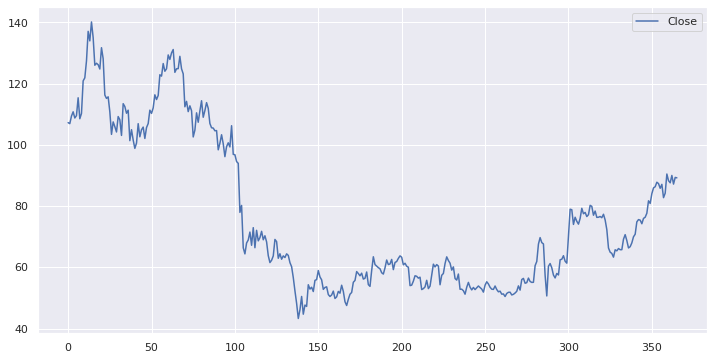

In [6]:
df[['Close']].plot(figsize=(12,6));


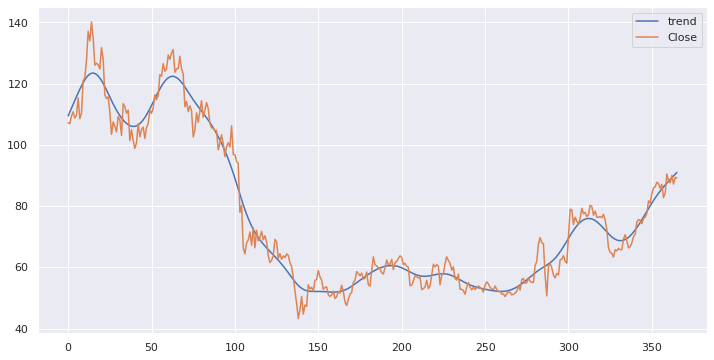

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [8]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.4563011639790076,
 0.5550072561756387,
 1,
 364,
 {'1%': -3.4484434475193777,
  '5%': -2.869513170510808,
  '10%': -2.571017574266393},
 1814.623774375179)

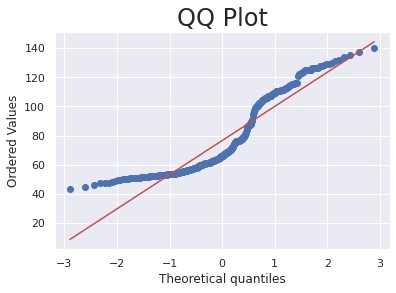

In [9]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [10]:
df['returns'] = df.Close.pct_change(1)*100

In [11]:
df['sq_returns'] = df.returns.mul(df.returns)


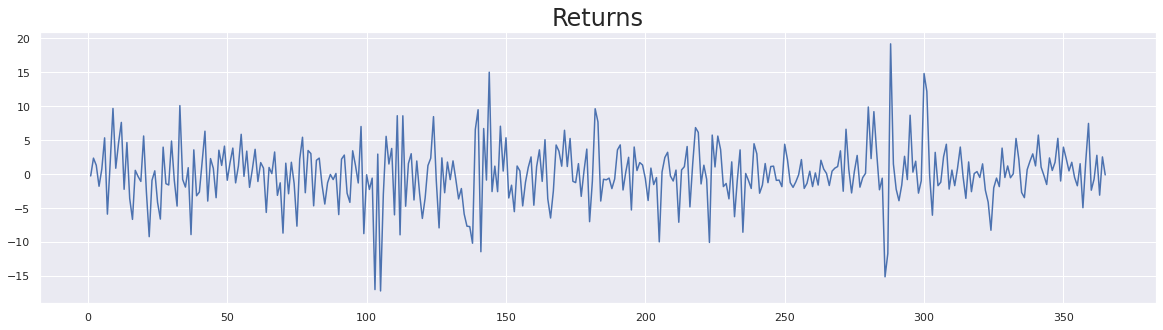

In [12]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


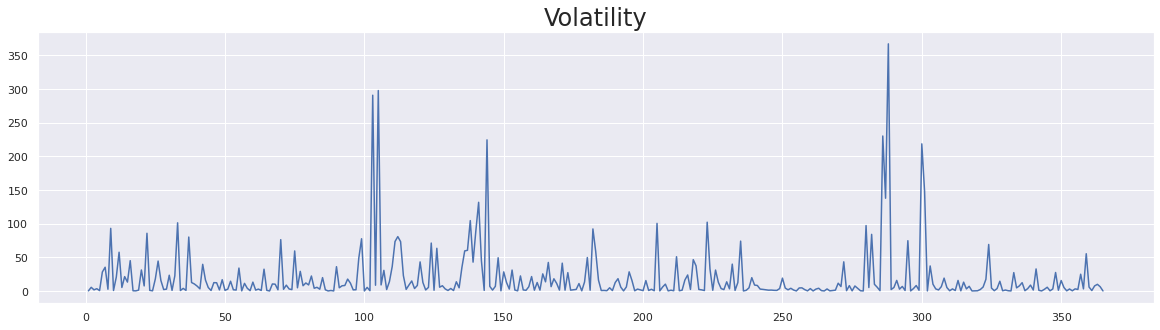

In [13]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

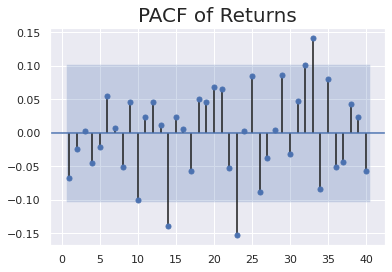

In [14]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

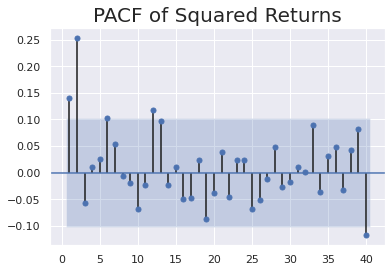

In [15]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [16]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 17.0 MB/s eta 0:00:00


In [17]:
from arch import arch_model


In [18]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [19]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1061.6765044046838
Iteration:      2,   Func. Count:     10,   Neg. LLF: 1054.4152926836887
Iteration:      3,   Func. Count:     15,   Neg. LLF: 1054.05887862834
Iteration:      4,   Func. Count:     20,   Neg. LLF: 1054.0252458826844
Iteration:      5,   Func. Count:     24,   Neg. LLF: 1054.025231617666
Iteration:      6,   Func. Count:     27,   Neg. LLF: 1054.0252316176588
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1054.025231617666
            Iterations: 6
            Function evaluations: 27
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1054.03
Distribution:                  Normal   AIC:                           2114.05
Method:            Maximum Likelihood   BIC:                           2125.75
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:38:37   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0510      0.224      0.228      0.820 [ -0.387,  0.489]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         16.8613      2.193      7.687  1.506e-14    [ 12.562, 21.160]
alpha[1]       0.1249  6.873e-02      1.817  6.916e-02 [-9.799e-03,  0.260]
===========================================================================

Covariance estimator: robust
"""

In [20]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     32,   Neg. LLF: 1046.1281589450582
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1045.3494803612662
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1045.35
Distribution:                  Normal   AIC:                           2098.70
Method:            Maximum Likelihood   BIC:                           2114.30
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:38:37   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0706      0.204      0.346      0.730 [ -0.330,  0.471]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         14.0677      2.044      6.883  5.850e-12    [ 10.062, 18.073]
alpha[1]       0.0654  4.579e-02      1.429      0.153 [-2.434e-02,  0.155]
alpha[2]       0.1906  8.307e-02      2.294  2.179e-02  [2.775e-02,  0.353]
===========================================================================

Covariance estimator: robust
"""

In [21]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 1045.3501390811925
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1045.3494802318576
            Iterations: 9
            Function evaluations: 62
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1045.35
Distribution:                  Normal   AIC:                           2100.70
Method:            Maximum Likelihood   BIC:                           2120.20
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:38:37   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0706      0.212      0.333      0.739 [ -0.344,  0.486]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         14.0673      2.180      6.452  1.104e-10      [  9.794, 18.341]
alpha[1]       0.0654  4.574e-02      1.430      0.153   [-2.424e-02,  0.155]
alpha[2]       0.1906  8.186e-02      2.328  1.989e-02    [3.016e-02,  0.351]
alpha[3]   7.0874e-32  4.560e-02  1.554e-30      1.000 [-8.938e-02,8.938e-02]
=============================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     87,   Neg. LLF: 1458.4146509558573
Iteration:     10,   Func. Count:    173,   Neg. LLF: 1035.7073979216466
Iteration:     15,   Func. Count:    256,   Neg. LLF: 1030.8038609720002
Iteration:     20,   Func. Count:    336,   Neg. LLF: 1030.8027618336068
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1030.8027618336068
            Iterations: 20
            Function evaluations: 336
            Gradient evaluations: 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1030.80
Distribution:                  Normal   AIC:                           2091.61
Method:            Maximum Likelihood   BIC:                           2150.10
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:38:37   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0841      0.424      0.198      0.843 [ -0.746,  0.915]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          6.7657     89.983  7.519e-02      0.940 [-1.696e+02,1.831e+02]
alpha[1]       0.0559      0.298      0.188      0.851      [ -0.528,  0.640]
alpha[2]       0.1966      0.123      1.597      0.110   [-4.475e-02,  0.438]
alpha[3]       0.0000      0.466      0.000      1.000      [ -0.913,  0.913]
alpha[4]       0.2222      0.119      1.864  6.239e-02   [-1.150e-02,  0.456]
alpha[5]       0.0000      0.808      0.000      1.000      [ -1.583,  1.583]
alpha[6]       0.0000      0.259      0.000      1.000      [ -0.509,  0.509]
alpha[7]       0.0364      1.078  3.380e-02      0.973      [ -2.077,  2.150]
alpha[8]       0.0000      0.564      0.000      1.000      [ -1.106,  1.106]
alpha[9]       0.0319      1.667  1.914e-02      0.985      [ -3.235,  3.299]
alpha[10]      0.0000      1.967      0.000      1.000      [ -3.854,  3.854]
alpha[11]      0.0000      2.285      0.000      1.000      [ -4.479,  4.479]
alpha[12]      0.0467      0.233      0.200      0.842      [ -0.411,  0.504]
alpha[13]      0.0743      0.224      0.331      0.741      [ -0.366,  0.514]
=============================================================================

Covariance estimator: robust
"""

In [23]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [24]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     33,   Neg. LLF: 1041.2981431848143
Iteration:     10,   Func. Count:     57,   Neg. LLF: 1041.2952351058254
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1041.2952351057768
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1041.30
Distribution:                  Normal   AIC:                           2090.59
Method:            Maximum Likelihood   BIC:                           2106.19
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:38:37   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0861      0.201      0.428      0.669 [ -0.308,  0.481]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.5911      0.847      1.879  6.018e-02 [-6.812e-02,  3.250]
alpha[1]       0.1196  3.896e-02      3.071  2.133e-03  [4.329e-02,  0.196]
beta[1]        0.7999  5.542e-02     14.434  3.184e-47    [  0.691,  0.909]
===========================================================================

Covariance estimator: robust
"""

In [25]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 1048.9891062155575
Iteration:     10,   Func. Count:     68,   Neg. LLF: 1041.2957630982303
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1041.2952351065628
            Iterations: 13
            Function evaluations: 86
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1041.30
Distribution:                  Normal   AIC:                           2092.59
Method:            Maximum Likelihood   BIC:                           2112.09
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:38:37   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0861      0.201      0.428      0.669 [ -0.308,  0.480]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.5911      0.971      1.639      0.101   [ -0.311,  3.494]
alpha[1]       0.1196  3.297e-02      3.629  2.846e-04 [5.502e-02,  0.184]
beta[1]        0.7999      0.353      2.263  2.363e-02   [  0.107,  1.493]
beta[2]    3.2205e-14      0.311  1.037e-13      1.000   [ -0.609,  0.609]
==========================================================================

Covariance estimator: robust
"""

In [26]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1054.4132676183208
Iteration:     10,   Func. Count:     79,   Neg. LLF: 1041.3049756215903
Iteration:     15,   Func. Count:    114,   Neg. LLF: 1041.295235137333
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1041.295235137333
            Iterations: 15
            Function evaluations: 114
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1041.30
Distribution:                  Normal   AIC:                           2094.59
Method:            Maximum Likelihood   BIC:                           2117.99
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:38:37   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0861      0.204      0.421      0.674 [ -0.315,  0.487]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.5910      6.730      0.236      0.813 [-11.600, 14.782]
alpha[1]       0.1196      0.362      0.331      0.741 [ -0.589,  0.828]
beta[1]        0.7999      2.819      0.284      0.777 [ -4.724,  6.324]
beta[2]    6.7637e-16      0.520  1.302e-15      1.000 [ -1.018,  1.018]
beta[3]        0.0000      2.586      0.000      1.000 [ -5.069,  5.069]
========================================================================

Covariance estimator: robust
"""

In [27]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 1041.345344315154
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1040.0618316578552
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1040.0618316577275
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1040.06
Distribution:                  Normal   AIC:                           2090.12
Method:            Maximum Likelihood   BIC:                           2109.62
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:38:38   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0910      0.200      0.455      0.649 [ -0.301,  0.483]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.7941      1.150      1.559      0.119    [ -0.461,  4.049]
alpha[1]       0.0551  4.948e-02      1.113      0.266 [-4.191e-02,  0.152]
alpha[2]       0.0980  7.413e-02      1.322      0.186 [-4.726e-02,  0.243]
beta[1]        0.7588  8.786e-02      8.636  5.807e-18    [  0.587,  0.931]
===========================================================================

Covariance estimator: robust
"""

In [28]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 1041.9986632032296
Iteration:     10,   Func. Count:     81,   Neg. LLF: 1040.063535357975
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1040.061831918913
            Iterations: 13
            Function evaluations: 102
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1040.06
Distribution:                  Normal   AIC:                           2092.12
Method:            Maximum Likelihood   BIC:                           2115.52
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:38:38   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0910      0.201      0.453      0.651 [ -0.303,  0.485]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.7945      1.256      1.429      0.153    [ -0.667,  4.256]
alpha[1]       0.0551  4.912e-02      1.121      0.262 [-4.120e-02,  0.151]
alpha[2]       0.0981  7.508e-02      1.306      0.192 [-4.910e-02,  0.245]
alpha[3]       0.0000  8.870e-02      0.000      1.000    [ -0.174,  0.174]
beta[1]        0.7588      0.116      6.542  6.058e-11    [  0.531,  0.986]
===========================================================================

Covariance estimator: robust
"""

In [29]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [30]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 1042.212993573339
Iteration:     10,   Func. Count:     75,   Neg. LLF: 1042.188949487042
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1042.1889494873453
            Iterations: 10
            Function evaluations: 75
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1042.19
Distribution:                  Normal   AIC:                           2094.38
Method:            Maximum Likelihood   BIC:                           2113.88
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:38:38   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0906      0.212      0.426      0.670 [ -0.326,  0.507]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3408      0.141      2.417  1.565e-02 [6.444e-02,  0.617]
alpha[1]       0.2366  7.995e-02      2.959  3.087e-03 [7.986e-02,  0.393]
gamma[1]      -0.0840  6.982e-02     -1.203      0.229 [ -0.221,5.287e-02]
beta[1]        0.8855  4.820e-02     18.370  2.280e-75   [  0.791,  0.980]
==========================================================================

Covariance estimator: robust
"""

In [31]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [32]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1040.01
Distribution:                  Normal   AIC:                           2090.03
Method:            Maximum Likelihood   BIC:                           2109.52
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:38:38   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu         6.8679e-03      0.211  3.258e-02      0.974 [ -0.406,  0.420]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.6197      0.828      1.956  5.044e-02 [-3.132e-03,  3.243]
alpha[1]       0.0648  5.276e-02      1.228      0.219 [-3.861e-02,  0.168]
gamma[1]       0.0908  7.575e-02      1.199      0.230 [-5.762e-02,  0.239]
beta[1]        0.8061  5.220e-02     15.444  8.289e-54    [  0.704,  0.908]
===========================================================================

Covariance estimator: robust
"""

In [33]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [34]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 1794.1654866735742
Iteration:     10,   Func. Count:     73,   Neg. LLF: 1042.7635657072983
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1042.6997812472728
            Iterations: 14
            Function evaluations: 98
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1042.70
Distribution:                  Normal   AIC:                           2095.40
Method:            Maximum Likelihood   BIC:                           2114.90
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:38:38   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0989      0.214      0.461      0.645 [ -0.321,  0.519]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5288      0.228      2.322  2.021e-02  [8.251e-02,  0.975]
alpha[1]       0.0642  5.638e-02      1.138      0.255 [-4.635e-02,  0.175]
gamma[1]       0.1069  7.927e-02      1.349      0.177 [-4.842e-02,  0.262]
beta[1]        0.7892  5.639e-02     13.995  1.661e-44    [  0.679,  0.900]
===========================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [36]:
from arch.univariate import FIGARCH

In [37]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 1043.546420932208
Iteration:     10,   Func. Count:     67,   Neg. LLF: 1042.329102806439
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1042.3291028063686
            Iterations: 10
            Function evaluations: 67
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -1042.33
Distribution:                  Normal   AIC:                           2094.66
Method:            Maximum Likelihood   BIC:                           2114.16
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:38:38   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1008      0.202      0.499      0.618 [ -0.295,  0.497]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.2076      0.922      1.309      0.190 [ -0.600,  3.015]
phi            0.0000      0.157      0.000      1.000 [ -0.308,  0.308]
d              0.5264      0.597      0.881      0.378 [ -0.645,  1.697]
beta           0.4705      0.536      0.879      0.380 [ -0.579,  1.520]
========================================================================

Covariance estimator: robust
"""

In [38]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [39]:
from arch.univariate import HARCH

In [40]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     31,   Neg. LLF: 1084.7060080746087
Iteration:     10,   Func. Count:     53,   Neg. LLF: 1054.1912366249621
Iteration:     15,   Func. Count:     73,   Neg. LLF: 1054.0252316410988
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1054.0252316410988
            Iterations: 16
            Function evaluations: 76
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -1054.03
Distribution:                  Normal   AIC:                           2114.05
Method:            Maximum Likelihood   BIC:                           2125.75
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:38:38   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0510      0.224      0.228      0.820 [ -0.387,  0.489]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         16.8617      2.194      7.687  1.507e-14    [ 12.562, 21.161]
alpha[1]       0.1249  6.872e-02      1.817  6.917e-02 [-9.804e-03,  0.260]
===========================================================================

Covariance estimator: robust
"""

In [41]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [42]:
from arch.univariate import APARCH


In [43]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 1092.4358155549967
Iteration:     10,   Func. Count:     80,   Neg. LLF: 1039.4482757956348
Iteration:     15,   Func. Count:    115,   Neg. LLF: 1039.1082117643841
Iteration:     20,   Func. Count:    151,   Neg. LLF: 1039.0256169189188
Iteration:     25,   Func. Count:    186,   Neg. LLF: 1039.013512368564
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1039.0134811738703
            Iterations: 28
            Function evaluations: 206
            Gradient evaluations: 28


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -1039.01
Distribution:                  Normal   AIC:                           2090.03
Method:            Maximum Likelihood   BIC:                           2113.43
                                        No. Observations:                  365
Date:                Thu, Jan 26 2023   Df Residuals:                      364
Time:                        02:38:39   Df Model:                            1
                                Mean Model                               
=========================================================================
                  coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------------------
mu         -8.1214e-03      0.209 -3.894e-02      0.969 [ -0.417,  0.401]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         13.3364     27.815      0.479      0.632    [-41.181, 67.854]
alpha[1]       0.0642  4.682e-02      1.372      0.170 [-2.754e-02,  0.156]
gamma[1]       0.1501      0.150      1.000      0.317    [ -0.144,  0.444]
beta[1]        0.7681  7.435e-02     10.332  5.065e-25    [  0.622,  0.914]
delta          3.4758      1.426      2.438  1.478e-02    [  0.681,  6.270]
===========================================================================

Covariance estimator: robust
"""

In [44]:
from scipy import stats


In [45]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=45.74638827637116, pvalue=1.1649248232714626e-10)

In [46]:
jarque_bera_test.statistic

45.74638827637116

In [47]:
jarque_bera_test.pvalue

1.1649248232714626e-10

jarquer-bera para los retornos

In [48]:
returns = df.returns[1:]
returns

1     -0.306357
2      2.318033
3      1.271050
4     -1.826161
5      0.724120
         ...   
361   -0.775270
362    2.734168
363   -3.135812
364    2.497774
365   -0.152765
Name: returns, Length: 365, dtype: float64

In [49]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=96.71567478494605, pvalue=0.0)

In [50]:
jarque_bera_test.statistic

96.71567478494605

In [51]:
jarque_bera_test.pvalue

0.0

curtosis

In [52]:
returns.kurt()

2.569995955453209

coef. asimetria

In [53]:
returns.skew()

-0.0642646085196993

In [54]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -20.536
P-value                         0.000
Lags                               17
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                -20.274
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -2.62 (1%), -2.00 (5%), -1.68 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -20.353
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.239
P-value                         0.203
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        366 non-null    object 
 1   Open        366 non-null    float64
 2   High        366 non-null    float64
 3   Low         366 non-null    float64
 4   Close       366 non-null    float64
 5   Adj Close   366 non-null    float64
 6   Volume      366 non-null    int64  
 7   trend       366 non-null    float64
 8   returns     365 non-null    float64
 9   sq_returns  365 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 28.7+ KB


In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [62]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [63]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [64]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [65]:
data = pd.read_csv("/content/LTC-USD.csv")

In [66]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-26,108.062302,115.783005,105.849983,107.282181,107.282181,1064088735
1,2022-01-27,107.261360,109.468987,103.784393,106.953514,106.953514,825647673
2,2022-01-28,106.927483,109.839325,105.818733,109.432732,109.432732,683706404
3,2022-01-29,109.431198,111.854065,108.312485,110.823677,110.823677,592402655
4,2022-01-30,110.830025,112.042725,107.720047,108.799858,108.799858,537737428
...,...,...,...,...,...,...,...
361,2023-01-22,88.314667,89.894447,86.989632,87.629974,87.629974,525923629
362,2023-01-23,87.630653,92.532982,87.630653,90.025925,90.025925,674337929
363,2023-01-24,90.011391,91.094902,86.699692,87.202881,87.202881,508764326
364,2023-01-25,87.218681,91.623344,85.990204,89.381012,89.381012,526831341


In [67]:
data = data[["Date","Close","Volume"]]


In [68]:
data

,Date,Close,Volume
0,2022-01-26,107.282181,1064088735
1,2022-01-27,106.953514,825647673
2,2022-01-28,109.432732,683706404
3,2022-01-29,110.823677,592402655
4,2022-01-30,108.799858,537737428
...,...,...,...
361,2023-01-22,87.629974,525923629
362,2023-01-23,90.025925,674337929
363,2023-01-24,87.202881,508764326
364,2023-01-25,89.381012,526831341


In [69]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2022-01-26,107.282181,1064088735,106.953514
1,2022-01-27,106.953514,825647673,109.432732
2,2022-01-28,109.432732,683706404,110.823677
3,2022-01-29,110.823677,592402655,108.799858
4,2022-01-30,108.799858,537737428,109.587700
...,...,...,...,...
361,2023-01-22,87.629974,525923629,90.025925
362,2023-01-23,90.025925,674337929,87.202881
363,2023-01-24,87.202881,508764326,89.381012
364,2023-01-25,89.381012,526831341,89.244469


In [70]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2022-01-26,107.282181,1064088735,106.953514
1,2022-01-27,106.953514,825647673,109.432732
2,2022-01-28,109.432732,683706404,110.823677
3,2022-01-29,110.823677,592402655,108.799858
4,2022-01-30,108.799858,537737428,109.587700
...,...,...,...,...
360,2023-01-21,88.314651,678058077,87.629974
361,2023-01-22,87.629974,525923629,90.025925
362,2023-01-23,90.025925,674337929,87.202881
363,2023-01-24,87.202881,508764326,89.381012


In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [72]:
price_volume_target_scaled_df

array([[0.66048335, 0.44879067, 0.65709053],
       [0.65709053, 0.32796972, 0.68268343],
       [0.68268343, 0.25604637, 0.69704212],
       ...,
       [0.48234745, 0.25129926, 0.45320524],
       [0.45320524, 0.16740112, 0.47569003],
       [0.47569003, 0.1765559 , 0.4742805 ]])

In [73]:
price_volume_target_scaled_df.shape

(365, 3)

In [74]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [75]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((365, 2), (365, 1))

In [76]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [77]:
X_train.shape, y_train.shape

((237, 2), (237, 1))

In [78]:
X_test.shape, y_test.shape

((128, 2), (128, 1))

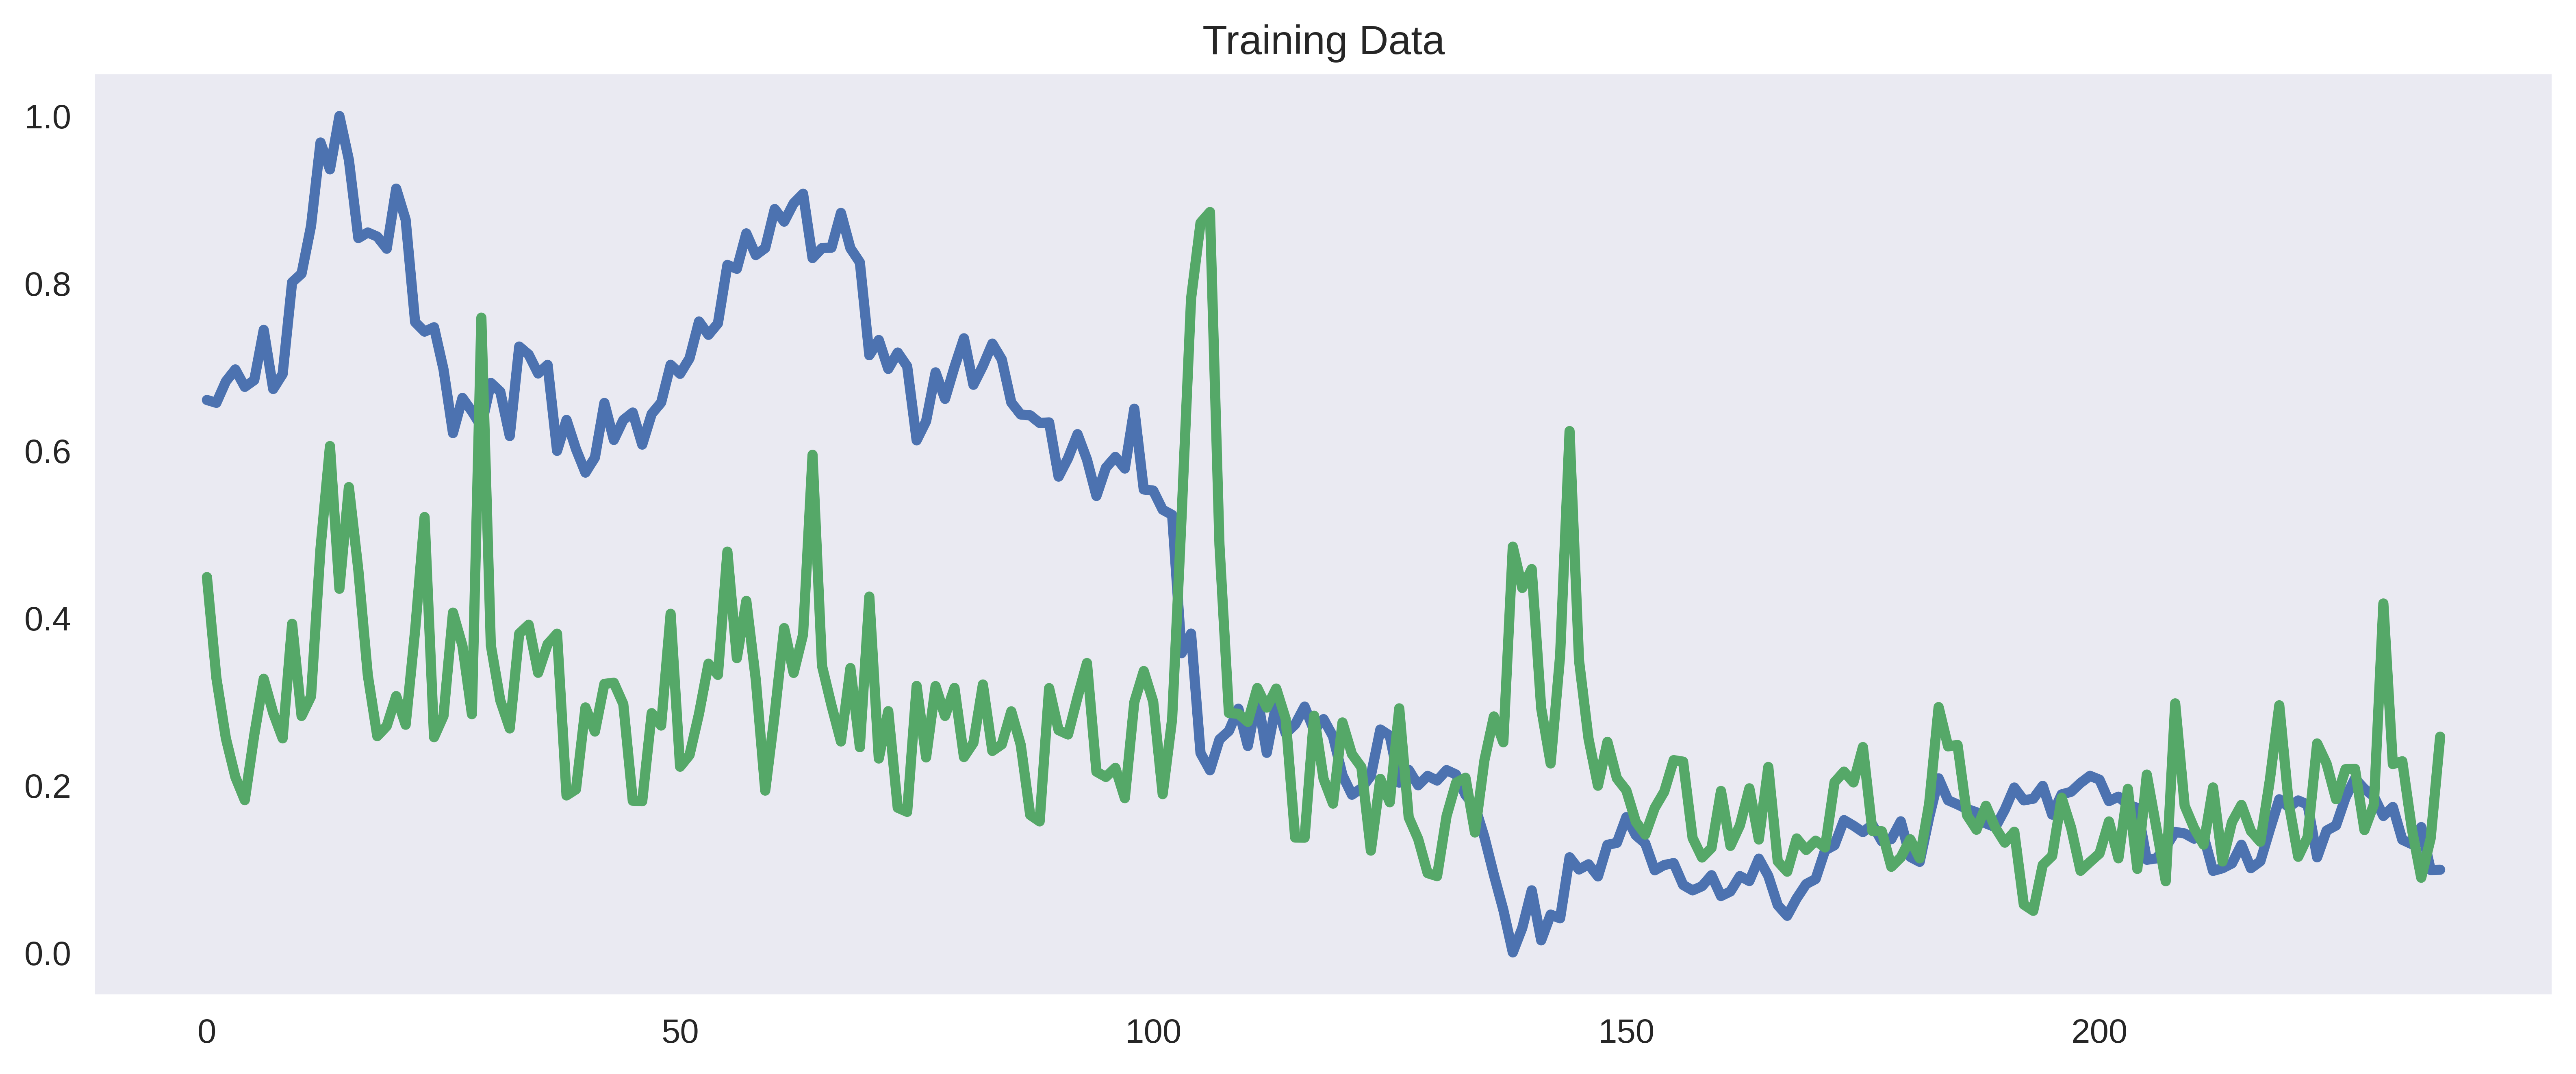

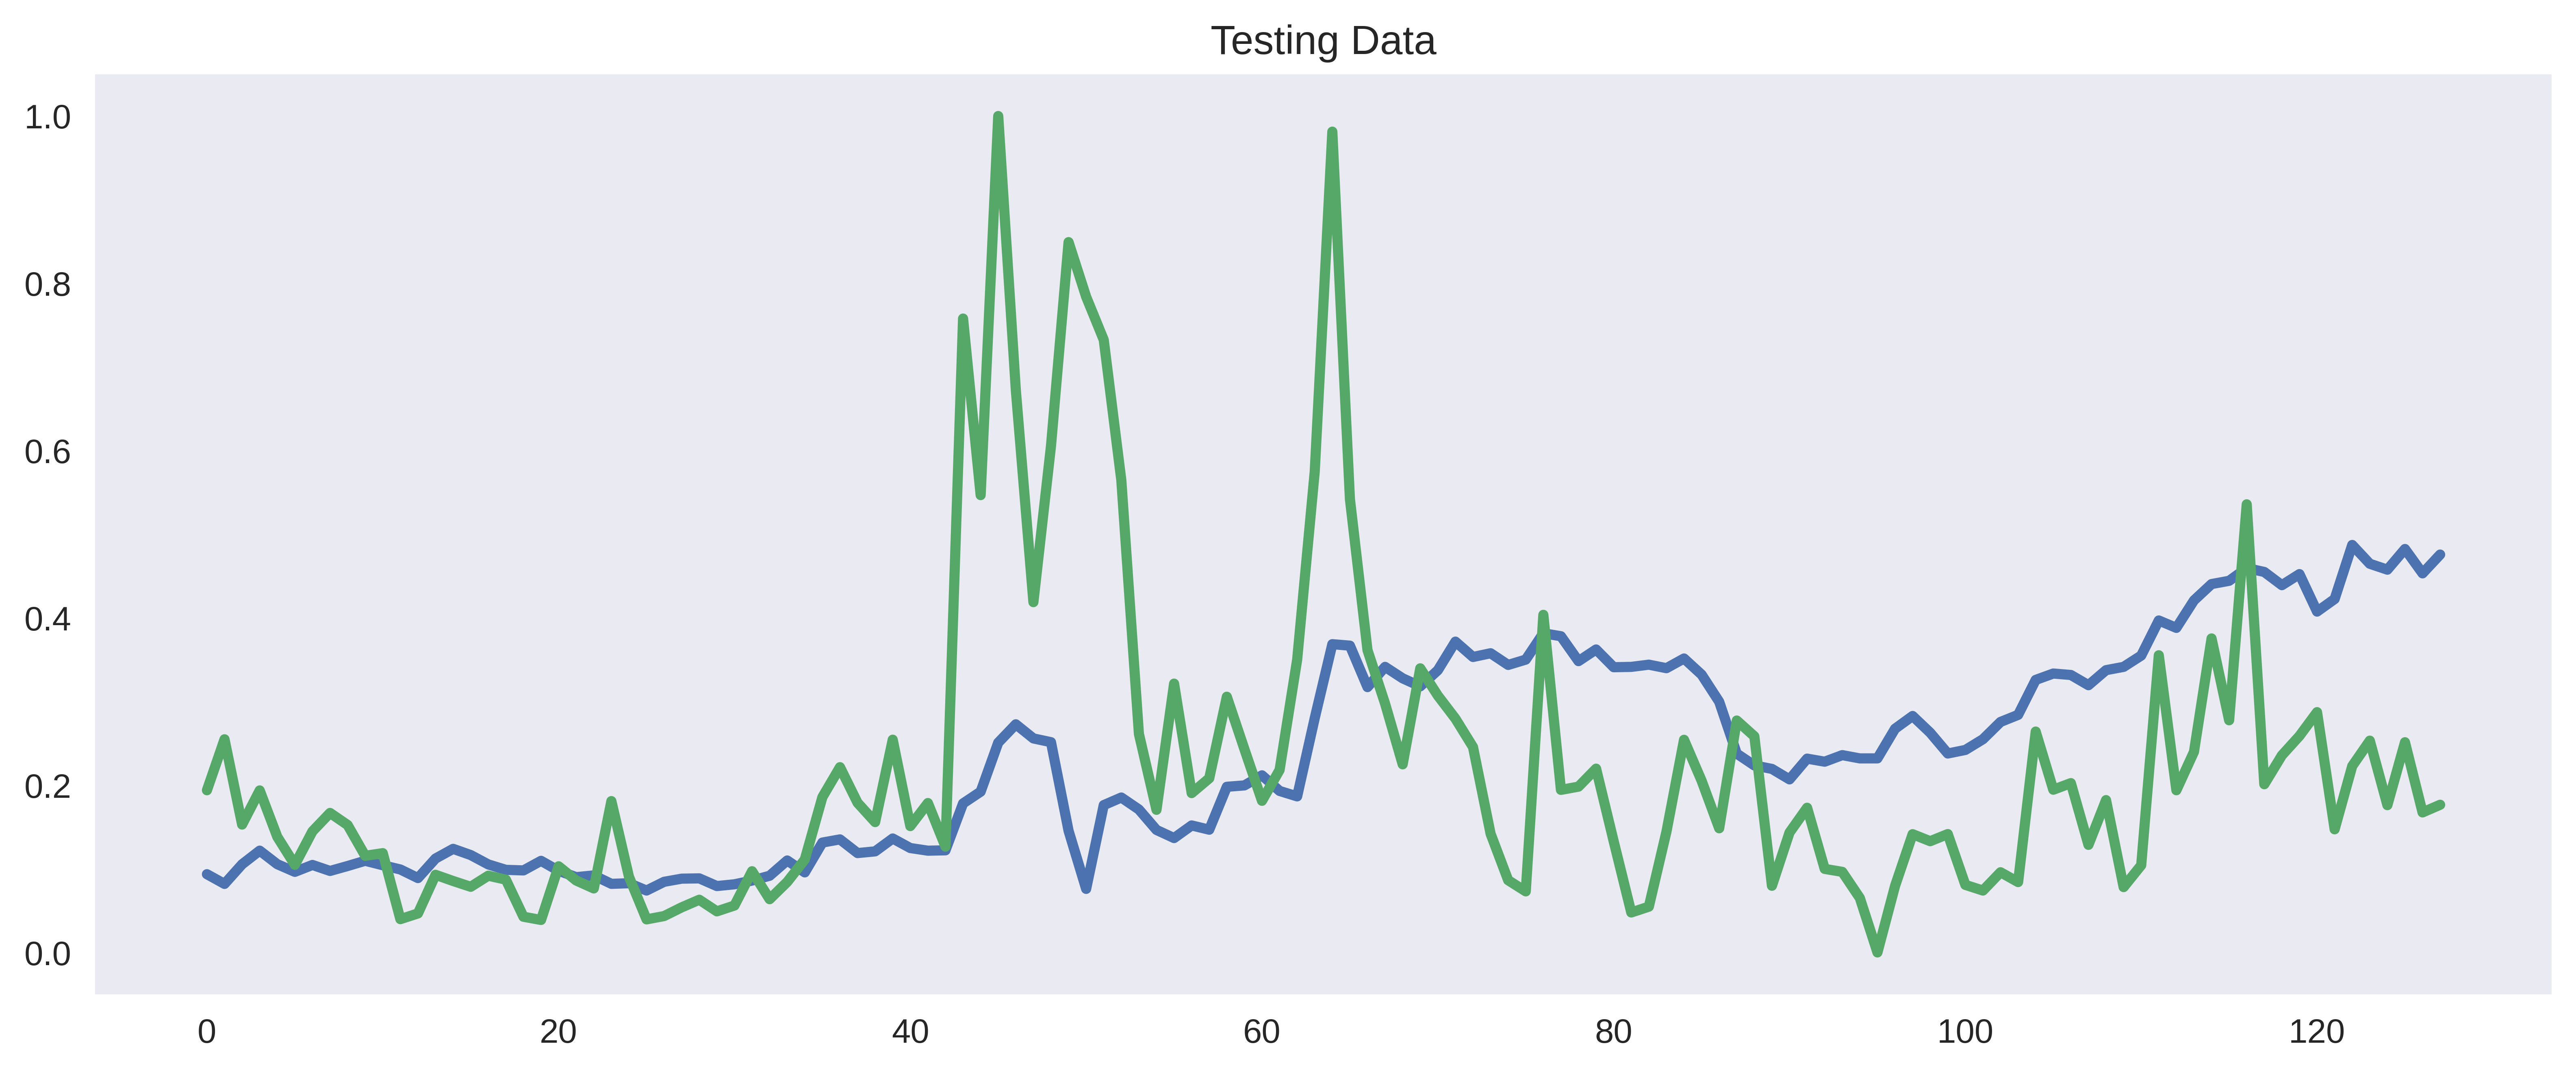

In [79]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [80]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [81]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9490072626803414


In [82]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.64935511],
       [0.64137909],
       [0.66250279],
       [0.67411931],
       [0.65344485],
       [0.66415653],
       [0.72306191],
       [0.65522399],
       [0.67075983],
       [0.77902277],
       [0.78430928],
       [0.83871606],
       [0.93917795],
       [0.91390801],
       [0.96690919],
       [0.92257235],
       [0.83102989],
       [0.83235187],
       [0.82481963],
       [0.81171623],
       [0.88048309],
       [0.84428622],
       [0.73406582],
       [0.72875915],
       [0.72325891],
       [0.67709882],
       [0.61060658],
       [0.6484239 ],
       [0.63011595],
       [0.63215316],
       [0.66531038],
       [0.65280021],
       [0.60177168],
       [0.70656283],
       [0.69798487],
       [0.67449545],
       [0.68553256],
       [0.58969432],
       [0.61669365],
       [0.58426232],
       [0.56179552],
       [0.57756027],
       [0.64099555],
       [0.59958762],
       [0.62091521],
       [0.62471323],
       [0.58873114],
       [0.627

In [83]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [84]:
len(Predicted)

365

In [85]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [86]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2022-01-26
1,2022-01-27
2,2022-01-28
3,2022-01-29
4,2022-01-30
...,...
360,2023-01-21
361,2023-01-22
362,2023-01-23
363,2023-01-24


In [87]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2022-01-26,0.660483
1,2022-01-27,0.657091
2,2022-01-28,0.682683
3,2022-01-29,0.697042
4,2022-01-30,0.676150
...,...,...
360,2023-01-21,0.464682
361,2023-01-22,0.457614
362,2023-01-23,0.482347
363,2023-01-24,0.453205


In [88]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2022-01-26,0.660483,0.649355
1,2022-01-27,0.657091,0.641379
2,2022-01-28,0.682683,0.662503
3,2022-01-29,0.697042,0.674119
4,2022-01-30,0.676150,0.653445
...,...,...,...
360,2023-01-21,0.464682,0.458132
361,2023-01-22,0.457614,0.448449
362,2023-01-23,0.482347,0.474609
363,2023-01-24,0.453205,0.443973


In [89]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [90]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [91]:
data

,Date,Close,Volume,Target
0,2022-01-26,107.282181,1064088735,106.953514
1,2022-01-27,106.953514,825647673,109.432732
2,2022-01-28,109.432732,683706404,110.823677
3,2022-01-29,110.823677,592402655,108.799858
4,2022-01-30,108.799858,537737428,109.587700
...,...,...,...,...
361,2023-01-22,87.629974,525923629,90.025925
362,2023-01-23,90.025925,674337929,87.202881
363,2023-01-24,87.202881,508764326,89.381012
364,2023-01-25,89.381012,526831341,89.244469


In [92]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2022-01-26,107.282181,1064088735,106.953514
1,2022-01-27,106.953514,825647673,109.432732
2,2022-01-28,109.432732,683706404,110.823677
3,2022-01-29,110.823677,592402655,108.799858
4,2022-01-30,108.799858,537737428,109.587700
...,...,...,...,...
361,2023-01-22,87.629974,525923629,90.025925
362,2023-01-23,90.025925,674337929,87.202881
363,2023-01-24,87.202881,508764326,89.381012
364,2023-01-25,89.381012,526831341,89.244469


In [93]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.07282181e+02, 1.06408874e+09],
       [1.06953514e+02, 8.25647673e+08],
       [1.09432732e+02, 6.83706404e+08],
       [1.10823677e+02, 5.92402655e+08],
       [1.08799858e+02, 5.37737428e+08],
       [1.09587700e+02, 6.91404381e+08],
       [1.15402000e+02, 8.24048434e+08],
       [1.08556023e+02, 7.43395485e+08],
       [1.10287003e+02, 6.83428425e+08],
       [1.20918037e+02, 9.53726676e+08],
       [1.21916740e+02, 7.36360985e+08],
       [1.27445503e+02, 7.82675364e+08],
       [1.37107391e+02, 1.13114350e+09],
       [1.33991241e+02, 1.37320382e+09],
       [1.40171600e+02, 1.03639346e+09],
       [1.35088394e+02, 1.27640377e+09],
       [1.26031158e+02, 1.08058772e+09],
       [1.26683678e+02, 8.32593853e+08],
       [1.26204216e+02, 6.88706404e+08],
       [1.24800056e+02, 7.12457600e+08],
       [1.31762619e+02, 7.83234535e+08],
       [1.28160843e+02, 7.15637001e+08],
       [1.16302414e+02, 9.38120691e+08],
       [1.15197090e+02, 1.20574285e+09],
       [1.157090

In [94]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [95]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [96]:
X

[array([0.66048335]),
 array([0.65709053]),
 array([0.68268343]),
 array([0.69704212]),
 array([0.67615029]),
 array([0.68428316]),
 array([0.74430404]),
 array([0.67363319]),
 array([0.69150205]),
 array([0.80124595]),
 array([0.81155554]),
 array([0.86862882]),
 array([0.96836825]),
 array([0.93620031]),
 array([1.]),
 array([0.94752619]),
 array([0.85402857]),
 array([0.86076452]),
 array([0.85581504]),
 array([0.84131994]),
 array([0.9131943]),
 array([0.87601326]),
 array([0.75359899]),
 array([0.74218876]),
 array([0.74747326]),
 array([0.69712844]),
 array([0.62092893]),
 array([0.66296722]),
 array([0.64689593]),
 array([0.62898084]),
 array([0.68096548]),
 array([0.67040867]),
 array([0.61736859]),
 array([0.72440732]),
 array([0.71480143]),
 array([0.69216638]),
 array([0.70249722]),
 array([0.59967709]),
 array([0.63668896]),
 array([0.60176355]),
 array([0.57363701]),
 array([0.59168551]),
 array([0.65697263]),
 array([0.61272234]),
 array([0.63656681]),
 array([0.64551727]

In [97]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [98]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [99]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((255, 1, 1), (110, 1, 1))

In [100]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [101]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
7/7 [==============================] - 11s 265ms/step - loss: 0.2619 - val_loss: 0.0075
Epoch 2/20
7/7 [==============================] - 0s 14ms/step - loss: 0.2029 - val_loss: 9.1716e-04
Epoch 3/20
7/7 [==============================] - 0s 18ms/step - loss: 0.1135 - val_loss: 0.0216
Epoch 4/20
7/7 [==============================] - 0s 16ms/step - loss: 0.0448 - val_loss: 0.1089
Epoch 5/20
7/7 [==============================] - 0s 15ms/step - loss: 0.0504 - val_loss: 0.0719
Epoch 6/20
7/7 [==============================] - 0s 17ms/step - loss: 0.0317 - val_loss: 0.0334
Epoch 7/20
7/7 [==============================] - 0s 15ms/step - loss: 0.0301 - val_loss: 0.0275
Epoch 8/20
7/7 [==============================] - 0s 14ms/step - loss: 0.0211 - val_loss: 0.0325
Epoch 9/20
7/7 [==============================] - 0s 16ms/step - loss: 0.0149 - val_loss: 0.0194
Epoch 10/20
7/7 [==============================] - 0s 17ms/step - loss: 0.0091 - val_loss: 0.0074
Epoch 11/20
7/7 [======

In [102]:
# Make prediction
predicted = model.predict(X)

12/12 [==============================] - 1s 4ms/step


In [103]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [104]:
test_predicted

[0.6334603,
 0.6298756,
 0.6570518,
 0.67243636,
 0.65008456,
 0.6587609,
 0.7237736,
 0.6474058,
 0.66648877,
 0.7870472,
 0.79866904,
 0.86392426,
 0.9816697,
 0.9431821,
 1.0199877,
 0.9566777,
 0.84708333,
 0.8548404,
 0.84913844,
 0.83250684,
 0.9159549,
 0.8724807,
 0.733996,
 0.72145295,
 0.7272543,
 0.67252916,
 0.59201217,
 0.6360881,
 0.61913776,
 0.6003887,
 0.65521777,
 0.6439785,
 0.5883181,
 0.70203066,
 0.69160146,
 0.6672012,
 0.67830724,
 0.5700524,
 0.6084368,
 0.57219857,
 0.5434391,
 0.5618504,
 0.62975115,
 0.5835065,
 0.60830903,
 0.6176895,
 0.57773983,
 0.6159693,
 0.63025767,
 0.67838585,
 0.666746,
 0.68681735,
 0.7348021,
 0.7172914,
 0.7323619,
 0.81048834,
 0.80519253,
 0.85362154,
 0.82386816,
 0.83346677,
 0.88733333,
 0.86981976,
 0.8953372,
 0.90874904,
 0.8197352,
 0.83348864,
 0.83396477,
 0.88190436,
 0.83323485,
 0.8138313,
 0.69067657,
 0.710532,
 0.6730844,
 0.69421124,
 0.67632425,
 0.58299273,
 0.6068311,
 0.6686531,
 0.6348672,
 0.6756084,
 0.7

In [105]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2022-01-27
2,2022-01-28
3,2022-01-29
4,2022-01-30
5,2022-01-31
...,...
361,2023-01-22
362,2023-01-23
363,2023-01-24
364,2023-01-25


In [106]:
df_predicted['predictions'] = test_predicted

In [107]:
df_predicted

,Date,predictions
1,2022-01-27,0.633460
2,2022-01-28,0.629876
3,2022-01-29,0.657052
4,2022-01-30,0.672436
5,2022-01-31,0.650085
...,...,...
361,2023-01-22,0.435589
362,2023-01-23,0.428787
363,2023-01-24,0.452693
364,2023-01-25,0.424556


In [108]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [109]:
df_predicted['Close'] = close[1:]

In [110]:
df_predicted

,Date,predictions,Close
1,2022-01-27,0.633460,0.657091
2,2022-01-28,0.629876,0.682683
3,2022-01-29,0.657052,0.697042
4,2022-01-30,0.672436,0.676150
5,2022-01-31,0.650085,0.684283
...,...,...,...
361,2023-01-22,0.435589,0.457614
362,2023-01-23,0.428787,0.482347
363,2023-01-24,0.452693,0.453205
364,2023-01-25,0.424556,0.475690


In [111]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")